In [1]:
# %matplotlib widget
import matplotlib as mpl

# mpl.rc('figure' dpi=300)
mpl.rc('image', interpolation='none')
mpl.rc('savefig', dpi=300, transparent=True, bbox='tight')

# Set the rendering backend.
# mpl.use('qt5agg')

# TODO: Verify if this is still needed?
# %config InlineBackend.figure_format = 'retina'

In [2]:
import fpipy as fpi
import matplotlib.collections as collections
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d

In [3]:
prefix = '/root/data/examples'
# file_name = 'a965ccdcc83d466386649b1a21a927b1078a71bb'
file_name = '766c5be2edbce6492a3bcbd850a0cdaf1654dad9'
file_path = '{0}/{1}/RawMeasurementCube.hdr'.format(prefix, file_name)

raw_dataset = fpi.read_ENVI_cfa(file_path)
rad_dataset = fpi.raw_to_radiance(raw_dataset)

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [4]:
rad_cube = rad_dataset.radiance.values.copy()
print(rad_cube.min(), rad_cube.max())
print(rad_cube[200:1000, 500:1500].min(), rad_cube[200:1000, 500:1500].max())

-0.057320032031230435 0.1779179723780686
-0.006051875328445233 0.1779179723780686


In [5]:
file_path = '{0}/{1}/WhiteReference.hdr'.format(prefix, file_name)

raw_dataset = fpi.read_ENVI_cfa(file_path)
ref_dataset = fpi.raw_to_radiance(raw_dataset)

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:217: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [6]:
ref_cube = ref_dataset.radiance.values.copy()
print(ref_cube.min(), ref_cube.max())
print(ref_cube[200:1000, 500:1500].min(), ref_cube[200:1000, 500:1500].max())

-0.16333744901278743 0.28334324624759133
-0.004075522884812665 0.23819479902504942


In [7]:
file_path = '{0}/{1}/RGB_Image.png'.format(prefix, file_name)
rgb_image = plt.imread(file_path)

print(rgb_image.min(), rgb_image.max())
print(rgb_image.shape)

0.07450981 0.85882354
(1200, 1920, 3)


In [8]:
cropped = rad_cube[200:1000, 500:1500]

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

-0.006051875328445233 0.1779179723780686
(506, 434, 119)
(450, 846, 82)


In [9]:
cropped = cropped / ref_cube[200:1000, 500:1500]

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

-37.103453753563 67.44348057581078
(54, 30, 119)
(20, 942, 119)


In [10]:
rgb_cropped = rgb_image[200:1000, 500:1500]

print(rgb_cropped.shape)

(800, 1000, 3)


In [11]:
cropped = cropped[..., 0:100]

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

0.004864181553632332 1.2084588712622557
(411, 479, 3)
(60, 958, 99)


In [12]:
cropped[cropped < 0] = 0
cropped[cropped > 1] = 1

print(cropped.min(), cropped.max())
print(np.unravel_index(cropped.argmin(), cropped.shape))
print(np.unravel_index(cropped.argmax(), cropped.shape))

0.004864181553632332 1.0
(411, 479, 3)
(58, 958, 87)


In [13]:
wavelengths = rad_dataset.wavelength.values[0:100]
print(wavelengths)

[460.   461.84 464.2  466.43 468.96 471.16 473.83 476.66 479.12 481.5
 483.88 486.82 489.01 491.28 494.12 496.09 498.67 501.44 504.48 506.89
 509.53 512.15 514.76 517.53 520.37 523.1  525.76 528.48 531.25 534.27
 536.97 539.63 542.39 545.15 547.8  550.48 553.09 555.93 558.72 561.27
 564.1  566.55 569.19 571.85 575.39 579.44 582.22 584.92 587.49 590.13
 592.77 595.46 598.37 600.98 603.7  606.47 609.16 612.   615.07 617.84
 621.01 623.53 626.28 629.25 632.06 634.8  637.95 640.51 643.59 646.8
 649.04 651.97 654.93 657.75 660.5  663.63 666.51 669.53 672.59 675.
 678.46 682.67 687.25 691.66 696.16 700.39 704.64 708.56 712.78 716.63
 720.81 725.04 729.34 733.99 738.38 742.65 746.64 751.27 755.19 759.42]


In [14]:
# Grab the "y" axis image.
y_image = cropped[:, -1]
print(y_image.shape)

# The y-axis image dimensions should be (wavelengths, pixel height).
y_dim = (wavelengths.shape[0], cropped.shape[0])
print(y_dim)

y_image = y_image.T
y_image = np.flipud(y_image)
assert y_image.shape == y_dim
print(y_image.shape)

(800, 100)
(100, 800)
(100, 800)


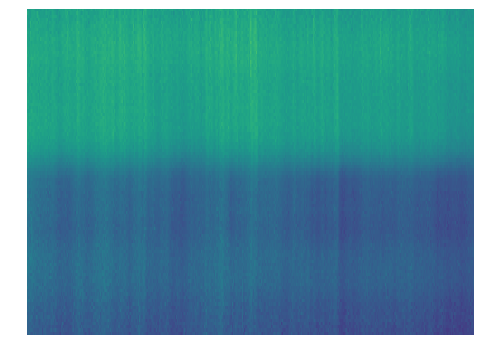

In [15]:
fig = plt.figure(figsize=(8, 6))

ax = fig.subplots()
ax.imshow(y_image, vmin=0, vmax=1, aspect='auto')
ax.set_axis_off()

plt.imsave('y_image.png', y_image, vmin=0, vmax=1)
fig.savefig('y_image.eps', dpi=600)
fig.show()

In [16]:
# Grab the "x" axis image.
x_image = cropped[-1, ...]
print(x_image.shape)

# The x-axis image dimensions should be (wavelengths, pixel width).
x_dim = (wavelengths.shape[0], cropped.shape[1])
print(x_dim)

x_image = x_image.T
x_image = np.flipud(x_image)
assert x_image.shape == x_dim
print(x_image.shape)

(1000, 100)
(100, 1000)
(100, 1000)


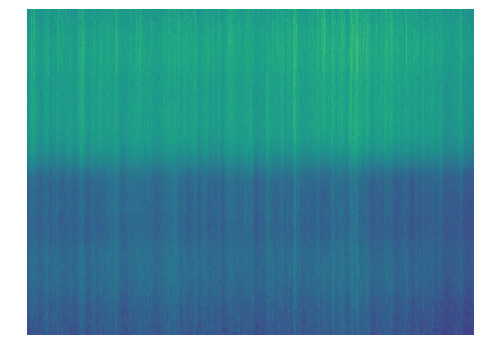

In [17]:
fig = plt.figure(figsize=(8, 6))

ax = fig.subplots()
ax.imshow(x_image, vmin=0, vmax=1, aspect='auto')
ax.set_axis_off()

plt.imsave('x_image.png', x_image, vmin=0, vmax=1)
fig.savefig('x_image.eps', dpi=600)
fig.show()

In [18]:
z_image = cropped[..., -1]
print(z_image.shape)

(800, 1000)


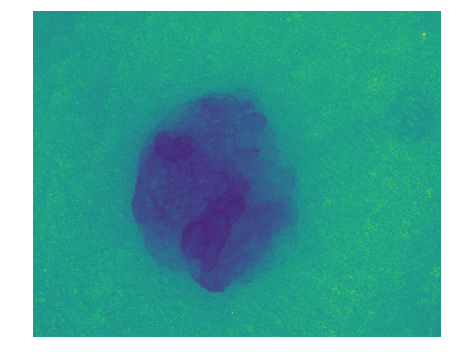

In [19]:
fig = plt.figure(figsize=(8, 6))

ax = fig.subplots()
ax.imshow(z_image, vmin=0, vmax=1, aspect='equal')
ax.set_axis_off()
fig.set_alpha(0)

plt.imsave('z_image.png', z_image, vmin=0, vmax=1)
fig.savefig('z_image.eps', dpi=600)
fig.show()

In [20]:
# z_image = plt.imread('z_image.png')
# print(z_image.shape)
# h, w, _ = z_image.shape

# xx, yy = np.meshgrid(np.linspace(1, w, w), np.linspace(1, h, h))
# zz = np.full((h, w), fill_value=100)

# print(yy.shape)
# print(xx.shape)
# print(zz.shape)

In [21]:
def image_plane(image):
    if type(image) is str:
        image = plt.imread(image)
    height, width = image.shape[0:2]
    
    xx, yy = np.meshgrid(
        np.linspace(1, width, width),
        np.linspace(1, height, height),
    )
    
    zz = np.zeros_like(xx)
    
    return image, xx, yy, zz

In [22]:
img, xx, yy, zz = image_plane('z_image.png')

print(yy.shape)
print(xx.shape)
print(zz.shape)

zz[:, :] = 100

(800, 1000)
(800, 1000)
(800, 1000)


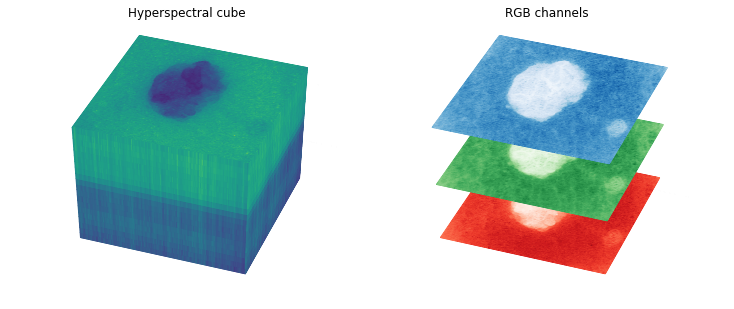

In [38]:
# The stride used when rendering the 3D surfaces.
stride = 5

# Change to 'ortho' for orthographic projection.
proj_type = 'persp'

# Common 3D view parameters; elevation and XY-plane azimuth.
view_params = { 'elev': 45, 'azim': -70 }

# fig = plt.figure(figsize=(6, 5))
fig = plt.figure(figsize=(10, 7))
gs1 = fig.add_gridspec(ncols=2, nrows=1, wspace=0, hspace=0)

ax_hsi = fig.add_subplot(gs1[0, 0], projection='3d')
ax_rgb = fig.add_subplot(gs1[0, 1], projection='3d')

# HSI visualization
# -----------------

ax_hsi.view_init(**view_params)
ax_hsi.set_proj_type(proj_type)
ax_hsi.set_aspect('equal', adjustable='box')
ax_hsi.set_title('Hyperspectral cube', pad=20)
ax_hsi.set_axis_off()

ax_hsi.set_zbound(0, 100)

# Plot the top surface, aka "z image".
img, xx, yy, zz = image_plane('z_image.png')
zz[:, :] = 100
ax_hsi.plot_surface(xx, yy, zz, cstride=stride, rstride=stride, facecolors=img, shade=False)

# Plot the front surface, aka "x image".
img, xx, yy, zz = image_plane('x_image.png')
img = np.flipud(img)
zz[:, :] = 1
ax_hsi.plot_surface(xx, zz, yy, cstride=stride, rstride=stride, facecolors=img, shade=False)

# Plot the side surface, aka "y image".
img, xx, yy, zz = image_plane('y_image.png')
img = np.flipud(img)
zz[:, :] = 1000
ax_hsi.plot_surface(zz, xx, yy, cstride=stride, rstride=stride, facecolors=img, shade=False)


# RGB visualization
# -----------------

ax_rgb.view_init(**view_params)
ax_rgb.set_proj_type(proj_type)
ax_rgb.set_aspect('equal', adjustable='box')
ax_rgb.set_title('RGB channels', pad=20)
ax_rgb.set_axis_off()

ax_rgb.set_zbound(1, 3)

img, xx, yy, zz = image_plane(rgb_cropped[..., 0])
cm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap('Reds'))
img = cm.to_rgba(img)
zz[:, :] = 1
ax_rgb.plot_surface(xx, yy, zz, cstride=stride, rstride=stride, facecolors=img, shade=False)

img, xx, yy, zz = image_plane(rgb_cropped[..., 1])
cm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap('Greens'))
img = cm.to_rgba(img)
zz[:, :] = 2
ax_rgb.plot_surface(xx, yy, zz, cstride=stride, rstride=stride, facecolors=img, shade=False)

img, xx, yy, zz = image_plane(rgb_cropped[..., 2])
cm = mpl.cm.ScalarMappable(cmap=mpl.cm.get_cmap('Blues'))
img = cm.to_rgba(img)
zz[:, :] = 3
ax_rgb.plot_surface(xx, yy, zz, cstride=stride, rstride=stride, facecolors=img, shade=False)

# --//--

gs1.tight_layout(fig, pad=0, h_pad=0, w_pad=0)

fig.savefig('hsi_rgb.png')
fig.savefig('hsi_rgb.pdf')
fig.savefig('hsi_rgb-highres.png', dpi=600)
fig.show()